 В этом проекте попробую импортировать только двумерный набор данных ЗАРАБОТАЛО

KanParameterTest1 - это то же самое, но проверка с разной размерностью данных

In [17]:
from kan import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [18]:
data = pd.read_csv('file_for_input/all_hour/SBER_tradestats_test_hour.csv')
data = data[['pr_open_hour','pr_close_hour']] # Не добавлются сюда другие лейблы
# ['vol','val','trades','trades_b','trades_s', 'val_b','val_s','vol_b','vol_s','pr_open_hour','pr_high_hour','pr_low_hour','pr_close_hour'] <- полный список параметров
data_lable= data [['pr_close_hour']]

data_tensor = torch.tensor(data.values, dtype=torch.float32)
data_tensor_lable=torch.tensor(data_lable.values, dtype=torch.float32)
print (data_tensor.shape)

torch.Size([8525, 2])


In [19]:
# Убедитесь, что device определен (проверить код в этой ячейке)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Создание датасета
dataset = create_dataset_from_data(data_tensor, data_tensor_lable, train_ratio=0.8, device=device)

# Проверка размеров датасета
print(dataset['train_input'].shape)
print(dataset['train_label'].shape)
print(dataset['test_input'].shape)
print(dataset['test_label'].shape)


torch.Size([6820, 2])
torch.Size([6820, 1])
torch.Size([1705, 2])
torch.Size([1705, 1])


In [20]:
dataset['train_input']

tensor([[239.7900, 239.8000],
        [229.3000, 228.4500],
        [124.2700, 124.7200],
        ...,
        [282.9600, 281.3400],
        [260.3500, 257.4000],
        [208.0100, 208.2600]])

In [21]:
dataset['train_label']  

tensor([[239.8000],
        [228.4500],
        [124.7200],
        ...,
        [281.3400],
        [257.4000],
        [208.2600]])

In [22]:
dataset['train_input'].shape, dataset['train_label'].shape 

(torch.Size([6820, 2]), torch.Size([6820, 1]))

# initialize KAN with G=3


In [23]:
model = KAN(width=[2,1,1], grid=6, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [24]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 5.06e-01 | test_loss: 5.01e-01 | reg: 1.93e+01 | : 100%|█| 50/50 [00:16<00:00,  3.00it

saving model version 0.1


In [25]:
model = model.refine(20)

saving model version 0.2


In [26]:

model.fit(dataset, opt="LBFGS", steps=50);


| train_loss: 2.85e-01 | test_loss: 3.30e-01 | reg: 1.93e+01 | : 100%|█| 50/50 [00:13<00:00,  3.83it

saving model version 0.3


In [27]:
grids = np.array([3,10,20,50,60])

train_losses = []
test_losses = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.06e-03 | test_loss: 3.05e-03 | reg: 5.63e+00 | : 100%|█| 50/50 [00:06<00:00,  7.20it


saving model version 0.1
saving model version 0.2


| train_loss: 4.61e-04 | test_loss: 4.75e-04 | reg: 5.63e+00 | : 100%|█| 50/50 [00:05<00:00,  8.99it


saving model version 0.3
saving model version 0.4


| train_loss: 3.56e-04 | test_loss: 3.74e-04 | reg: 5.63e+00 | : 100%|█| 50/50 [00:04<00:00, 10.61it


saving model version 0.5
saving model version 0.6


| train_loss: 7.61e-04 | test_loss: 6.01e-04 | reg: 5.63e+00 | : 100%|█| 50/50 [00:09<00:00,  5.14it


saving model version 0.7
saving model version 0.8


| train_loss: 8.14e-04 | test_loss: 8.62e-04 | reg: 5.63e+00 | : 100%|█| 50/50 [00:19<00:00,  2.62it

saving model version 0.9


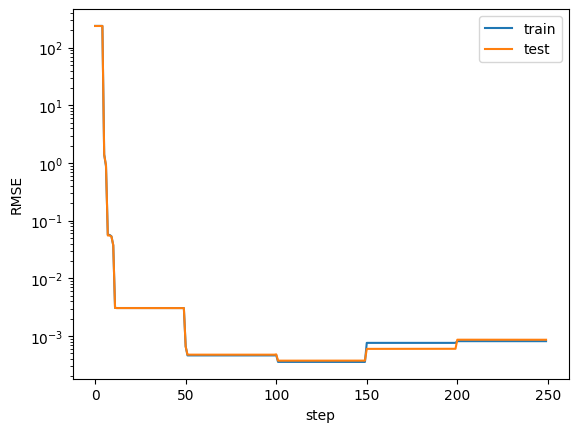

In [28]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

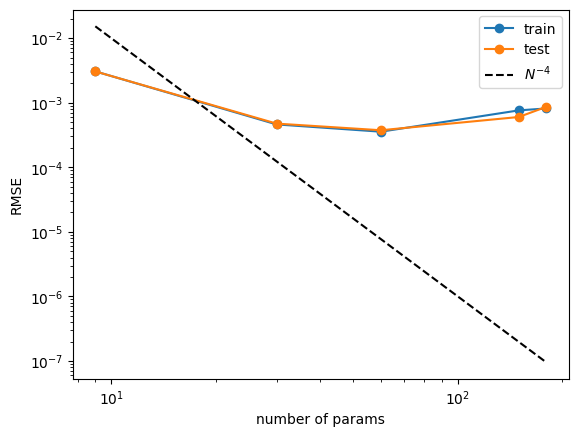

In [29]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

In [30]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>